In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import plotly
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random

In [2]:
!pip install lazypredict

In [3]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
train_data.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train_data['Pclass'] = train_data['Pclass'].astype('object')

In [6]:
train_data['SibSp'] = train_data['SibSp'].astype('object')
train_data['Parch'] = train_data['Parch'].astype('object')

In [7]:
sample_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
sample_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    object 
 7   Parch        891 non-null    object 
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 83.7+ KB


In [9]:
train_data['Cabin'].fillna('NoInformation', inplace=True)
test_data['Cabin'].fillna('NoInformation', inplace=True)

In [10]:
nan_count_per_row = train_data.isna().sum(axis=0)
print(nan_count_per_row)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64


In [11]:
nan_count_per_row = test_data.isna().sum(axis=0)
print(nan_count_per_row)

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
dtype: int64


In [12]:
from sklearn.impute import SimpleImputer

numerical_imputer = SimpleImputer(strategy='mean')
numerical_columns = ['Age','Fare']
train_data[numerical_columns] = numerical_imputer.fit_transform(train_data[numerical_columns])

categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_columns = ['Embarked']
train_data[categorical_columns] = categorical_imputer.fit_transform(train_data[categorical_columns])


numerical_imputer = SimpleImputer(strategy='mean')
numerical_columns = ['Age','Fare']
test_data[numerical_columns] = numerical_imputer.fit_transform(test_data[numerical_columns])

categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_columns = ['Embarked']
test_data[categorical_columns] = categorical_imputer.fit_transform(test_data[categorical_columns])

In [13]:
nan_count_per_row = train_data.isna().sum(axis=0)
print(nan_count_per_row)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [14]:
nan_count_per_row = test_data.isna().sum(axis=0)
print(nan_count_per_row)

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


<Axes: >

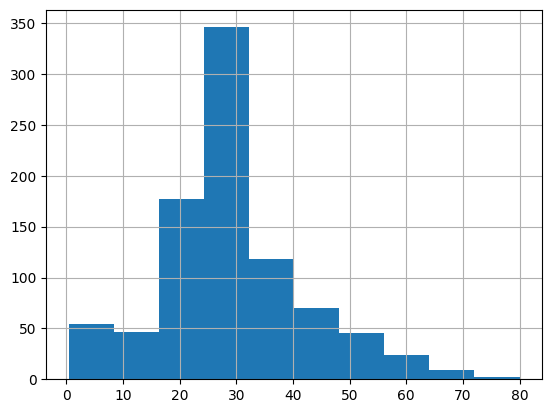

In [15]:
train_data.Age.hist()

In [16]:
age_bins = [-1, 12, 18, 25, 30, 50, 1.e+10]  # Границы интервалов
age_labels = ['Age_0-12', 'Age_13-17', 'Age_18-25', 'Age_26-30', 'Age_31-50', 'Age_51+']
train_data['Age_Group'] = pd.cut(train_data['Age'], bins=age_bins, labels=age_labels).astype('object')
test_data['Age_Group'] = pd.cut(test_data['Age'], bins=age_bins, labels=age_labels).astype('object')

In [17]:
train_data = train_data.drop(['Name','Ticket'],axis=1)
test_data = test_data.drop(['Name','Ticket'],axis=1)

In [18]:
val = 0.2

In [19]:
len(train_data)

891

In [20]:
print(len(train_data[train_data.Survived == 0]))
print(len(train_data[train_data.Survived == 1]))

549
342


In [21]:
train_data = train_data.drop('PassengerId',axis=1)
# test_data = test_data.drop('PassengerId',axis=1)

In [22]:
def data_split(train_data, val):
    len_survived = len(train_data[train_data.Survived == 1])
    
    survived_data = train_data[train_data.Survived == 1]
    unsurvived_data = train_data[train_data.Survived == 0]


    survived_train_size = int(len_survived*(1-val))
    
    survived_train_data = survived_data.sample(n=survived_train_size)
    unsurvived_train_data = unsurvived_data.sample(n=survived_train_size)
        
    valid_data = train_data[~train_data.isin(pd.concat([survived_train_data, unsurvived_train_data],axis=0).to_dict(orient='list')).all(axis=1)]
    return pd.concat([survived_train_data,unsurvived_train_data]).drop('Survived',axis=1), pd.concat([survived_train_data,unsurvived_train_data])['Survived'], valid_data.drop('Survived',axis=1),valid_data['Survived']

In [23]:
# X_train, y_train, X_valid, y_valid = data_split(train_data, val)
# print(len(X_train))
# print(len(X_valid))
# print(len(train_data))
# # X_train=X_train.drop('PassengerId',axis=1)
# # X_valid=X_valid.drop('PassengerId',axis=1)

In [24]:
from sklearn.model_selection import train_test_split

X, y = train_data.drop('Survived', axis=1), train_data['Survived']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=val, random_state=280309, stratify=y)

In [25]:
features_to_normalize = list(X_train.select_dtypes(include=['float64']).columns)
features_to_normalize

['Age', 'Fare']

In [26]:
object_columns = list(X_train.select_dtypes(include=['object']).columns)
object_columns

['Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked', 'Age_Group']

In [27]:
# scaler = StandardScaler()
# X_train[features_to_normalize] = scaler.fit_transform(X_train[features_to_normalize])
# X_valid[features_to_normalize] = scaler.fit_transform(X_valid[features_to_normalize])
# test_data[features_to_normalize] = scaler.fit_transform(test_data[features_to_normalize])

In [28]:
for column in object_columns:
    X_train[column] = X_train[column].astype(str)
    
for column in object_columns:
    X_valid[column] = X_valid[column].astype(str)
    
for column in object_columns:
    test_data[column] = test_data[column].astype(str)

In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in X_train.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X_train[column] = label_encoders[column].fit_transform(X_train[column])
    
label_encoders = {}
for column in X_valid.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X_valid[column] = label_encoders[column].fit_transform(X_valid[column])

for column in test_data.drop('PassengerId',axis=1).select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    test_data[column] = label_encoders[column].fit_transform(test_data[column])

In [30]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_Group
0,892,2,1,34.50000,0,0,7.8292,76,1,4
1,893,2,0,47.00000,1,0,7.0000,76,2,4
2,894,1,1,62.00000,0,0,9.6875,76,1,5
3,895,2,1,27.00000,0,0,8.6625,76,2,3
4,896,2,0,22.00000,1,1,12.2875,76,2,2
...,...,...,...,...,...,...,...,...,...,...
413,1305,2,1,30.27259,0,0,8.0500,76,2,4
414,1306,0,0,39.00000,0,0,108.9000,22,0,4
415,1307,2,1,38.50000,0,0,7.2500,76,2,4
416,1308,2,1,30.27259,0,0,8.0500,76,2,4


In [31]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_Group
24,2,0,8.000000,3,1,21.0750,128,2,0
121,2,1,29.699118,0,0,8.0500,128,2,3
740,0,1,29.699118,0,0,30.0000,96,2,3
471,2,1,38.000000,0,0,8.6625,128,2,4
62,0,1,45.000000,1,0,83.4750,72,2,4
...,...,...,...,...,...,...,...,...,...
349,2,1,42.000000,0,0,8.6625,128,2,4
645,0,1,48.000000,1,0,76.7292,92,0,4
172,2,0,1.000000,1,1,11.1333,128,2,0
393,0,0,23.000000,1,0,113.2750,94,0,2


In [32]:
# https://www.kaggle.com/code/kimtaehun/eda-and-baseline-with-multiple-models
def plot_count(df: pd.core.frame.DataFrame, col: str, title_name: str='Train') -> None:
    # Set background color
    
    f, ax = plt.subplots(1, 2, figsize=(14, 7))
    plt.subplots_adjust(wspace=0.2)

    s1 = df[col].value_counts()
    N = len(s1)

    outer_sizes = s1
    inner_sizes = s1/N

    outer_colors = ['#9E3F00', '#eb5e00']
    inner_colors = ['#ff6905', '#ff8838']

    ax[0].pie(
        outer_sizes,colors=outer_colors, 
        labels=s1.index.tolist(), 
        startangle=90, frame=True, radius=1.3, 
        explode=([0.05]*(N-1) + [.3]),
        wedgeprops={'linewidth' : 1, 'edgecolor' : 'white'}, 
        textprops={'fontsize': 12, 'weight': 'bold'}
    )

    textprops = {
        'size': 13, 
        'weight': 'bold', 
        'color': 'white'
    }

    ax[0].pie(
        inner_sizes, colors=inner_colors,
        radius=1, startangle=90,
        autopct='%1.f%%', explode=([.1]*(N-1) + [.3]),
        pctdistance=0.8, textprops=textprops
    )

    center_circle = plt.Circle((0,0), .68, color='black', fc='white', linewidth=0)
    ax[0].add_artist(center_circle)

    x = s1
    y = s1.index.tolist()
    sns.barplot(
        x=x, y=y, ax=ax[1],
        palette='YlOrBr_r', orient='horizontal'
    )

    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].tick_params(
        axis='x',         
        which='both',      
        bottom=False,      
        labelbottom=False
    )

    for i, v in enumerate(s1):
        ax[1].text(v, i+0.1, str(v), color='black', fontweight='bold', fontsize=12)

    plt.setp(ax[1].get_yticklabels(), fontweight="bold")
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    ax[1].set_xlabel(col, fontweight="bold", color='black')
    ax[1].set_ylabel('count', fontweight="bold", color='black')

    f.suptitle(f'{title_name}', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()

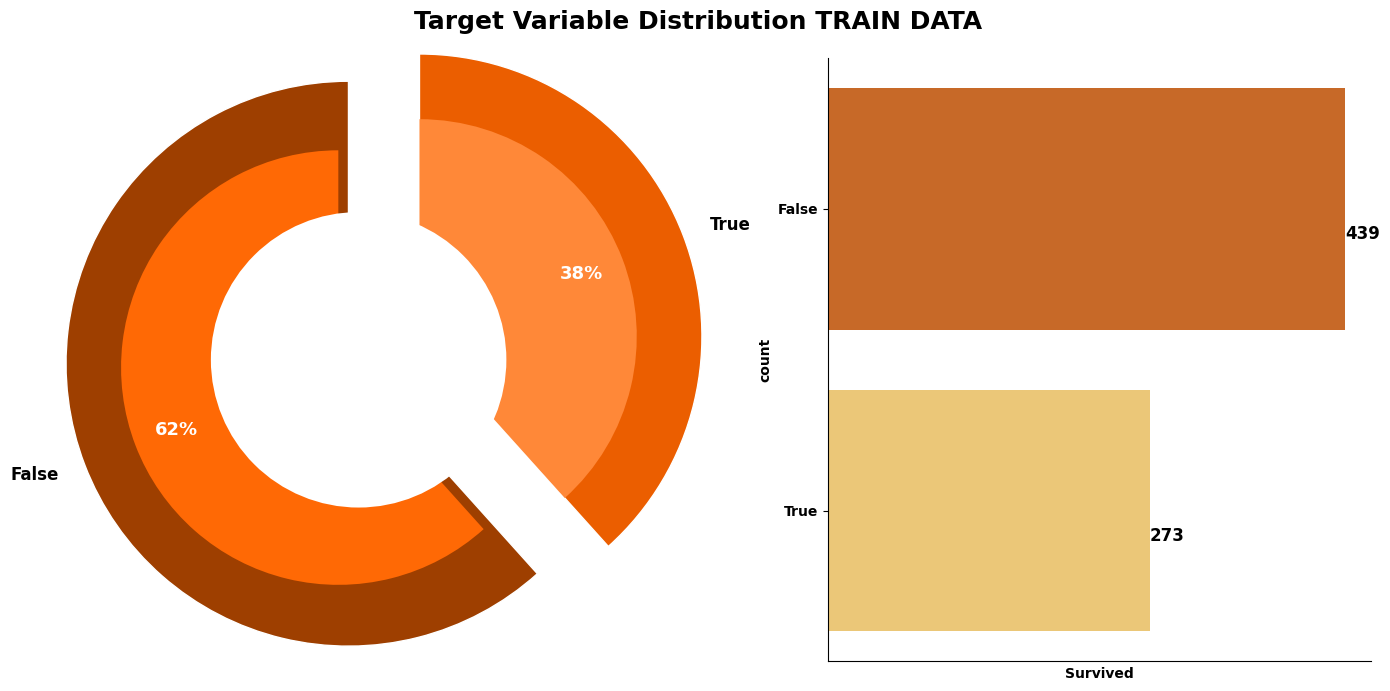

In [33]:
plot_count(pd.DataFrame({'Survived':y_train.values}).replace({1:True,0:False}), 'Survived', 'Target Variable Distribution TRAIN DATA')

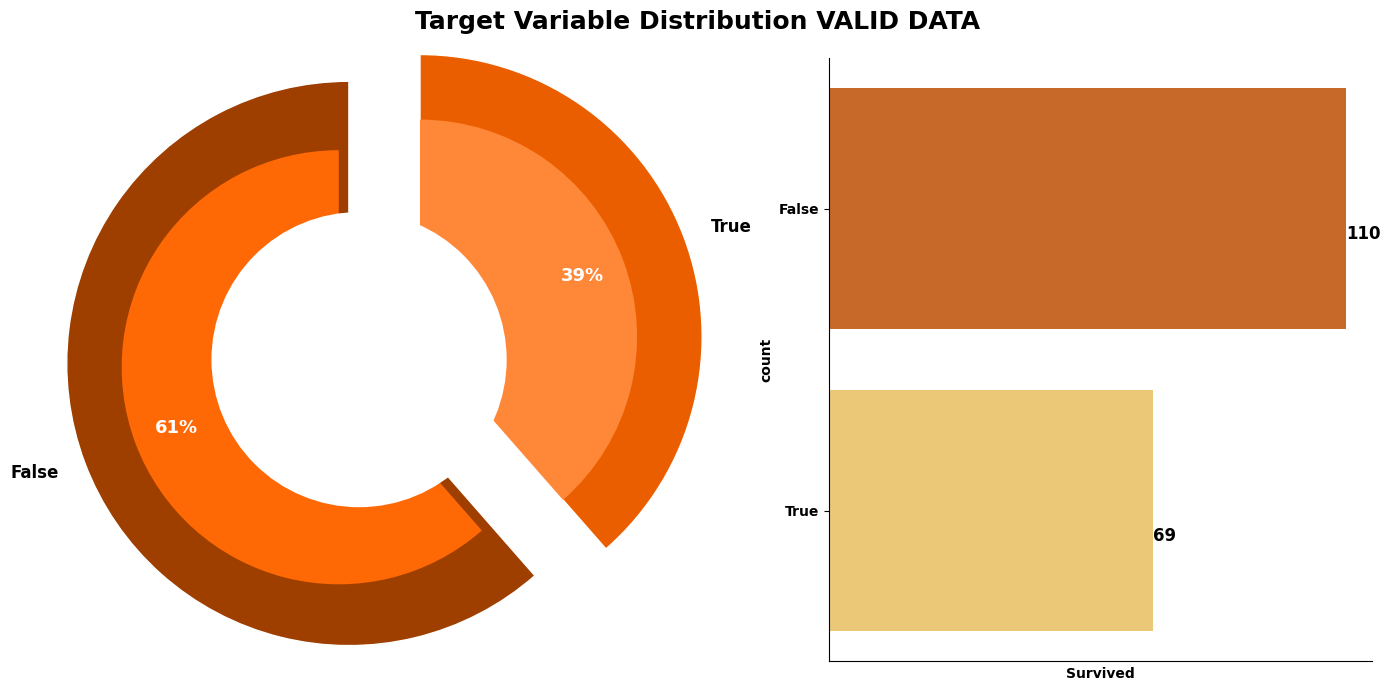

In [34]:
plot_count(pd.DataFrame({'Survived':y_valid.values}).replace({1:True,0:False}), 'Survived', 'Target Variable Distribution VALID DATA')

In [35]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit( X_train, X_valid , y_train, y_valid)
models

100%|██████████| 29/29 [00:02<00:00, 14.42it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.85,0.84,0.84,0.85,0.22
LGBMClassifier,0.85,0.84,0.84,0.85,0.53
DecisionTreeClassifier,0.83,0.83,0.83,0.83,0.02
BaggingClassifier,0.84,0.83,0.83,0.84,0.05
XGBClassifier,0.84,0.83,0.83,0.84,0.13
AdaBoostClassifier,0.81,0.81,0.81,0.81,0.12
NuSVC,0.81,0.80,0.80,0.81,0.04
SVC,0.81,0.80,0.80,0.81,0.03
LogisticRegression,0.81,0.80,0.80,0.81,0.02


In [36]:
from catboost import CatBoostClassifier
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


def objective_cat(trial):
    """Define the objective function"""

    params = {
        "iterations" : trial.suggest_int("iterations", 100, 5000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01,1.0),
        "depth" : trial.suggest_int("depth", 1, 10),
        "l2_leaf_reg" : trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        "bootstrap_type" : trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
        "random_strength" : trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        "bagging_temperature" : trial.suggest_float("bagging_temperature", 0.0, 10.0),
        "od_type" : trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        "od_wait" : trial.suggest_int("od_wait", 10, 50),
        "verbose" : False
        
    }


    model_cat = CatBoostClassifier(**params)
    scores = cross_val_score(model_cat, X_train, y_train, cv=10, scoring='accuracy')  
    
    return scores.mean() 

In [37]:
study_cat = optuna.create_study(direction='maximize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_cat.optimize(objective_cat, n_trials=100,show_progress_bar=True)

[I 2023-10-08 11:51:25,769] A new study created in memory with name: no-name-b3ee4a9c-b524-4ed6-a682-5aa09aaefa79


  0%|          | 0/100 [00:00<?, ?it/s]

In [38]:
# Print the best parameters
print('Best parameters', study_cat.best_params)

Best parameters {'iterations': 1694, 'learning_rate': 0.07896781749755595, 'depth': 2, 'l2_leaf_reg': 12.686082056632571, 'bootstrap_type': 'Bayesian', 'random_strength': 0.0029149654374076924, 'bagging_temperature': 8.32471473548817, 'od_type': 'IncToDec', 'od_wait': 25}


In [39]:
cat = CatBoostClassifier(**study_cat.best_params, verbose=False)
cat.fit(X_train, y_train)
y_pred = cat.predict(X_valid)

print('Accuracy: ', accuracy_score(y_valid, y_pred))

Accuracy:  0.8435754189944135


In [40]:
from lightgbm import LGBMClassifier
import optuna

def objective_lgb(trial):
    """Define the objective function"""

    params = {
        'objective': trial.suggest_categorical('objective', ['binary']),
        'metric': trial.suggest_categorical('metric', ['logloss']),
        'max_depth': trial.suggest_int('max_depth', 1, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 5000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        "random_state" : trial.suggest_categorical('random_state', [17]),
    }

    model_lgb = LGBMClassifier(**params)
    scores = cross_val_score(model_lgb, X_train, y_train, cv=10, scoring='accuracy')  
    
    return scores.mean()

In [41]:
study_lgb = optuna.create_study(direction='maximize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_lgb.optimize(objective_lgb, n_trials=100,show_progress_bar=True)

  0%|          | 0/100 [00:00<?, ?it/s]

In [42]:
# Print the best parameters
print('Best parameters', study_lgb.best_params)

Best parameters {'objective': 'binary', 'metric': 'logloss', 'max_depth': 1, 'min_child_samples': 12, 'learning_rate': 0.6738024677617338, 'n_estimators': 798, 'min_child_weight': 2, 'subsample': 0.6281014274275754, 'colsample_bytree': 0.19911685772471388, 'reg_alpha': 0.9618624607290799, 'reg_lambda': 0.23908639242557098, 'random_state': 17}


In [43]:
lgb = LGBMClassifier(**study_lgb.best_params)
lgb.fit(X_train, y_train)
y_pred = lgb.predict(X_valid)

print('Accuracy: ', accuracy_score(y_valid, y_pred))

Accuracy:  0.8156424581005587


In [44]:
from xgboost import XGBClassifier
import optuna
def objective_xg(trial):
    """Define the objective function"""

    params = {
        'booster': trial.suggest_categorical('booster', ['gbtree']),
        'max_depth': trial.suggest_int('max_depth', 1, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 5000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric':trial.suggest_categorical('eval_metric', ['mlogloss']),
    }

    model_xgb = XGBClassifier(**params)
    scores = cross_val_score(model_xgb, X_train, y_train, cv=10, scoring='accuracy')  
    
    return scores.mean()

In [45]:
study_xgb = optuna.create_study(direction='maximize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_xgb.optimize(objective_xg, n_trials=100,show_progress_bar=True)

  0%|          | 0/100 [00:00<?, ?it/s]

In [46]:
# Print the best parameters
print('Best parameters', study_xgb.best_params)

Best parameters {'booster': 'gbtree', 'max_depth': 11, 'learning_rate': 0.06692912139812608, 'n_estimators': 1747, 'min_child_weight': 9, 'gamma': 9.764659548656741e-06, 'subsample': 0.6350026212488684, 'colsample_bytree': 0.029923924533301904, 'reg_alpha': 0.003159365072967417, 'reg_lambda': 0.12193002594440434, 'eval_metric': 'mlogloss'}


In [47]:
xgb = XGBClassifier(**study_xgb.best_params)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_valid)

print('Accuracy: ', accuracy_score(y_valid, y_pred))

Accuracy:  0.8044692737430168


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
import optuna
def objective_rfc(trial):
    """Define the objective function"""
    
    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 15),
        'n_estimators': trial.suggest_int('n_estimators', 100, 5000),
        'bootstrap':trial.suggest_categorical('bootstrap', [True]),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 15),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 15),
    }
    
    model_rfc = RandomForestClassifier(**params)
    scores = cross_val_score(model_rfc, X_train, y_train, cv=10, scoring='accuracy')  
    
    return scores.mean()

In [49]:
study_rfc = optuna.create_study(direction='maximize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_rfc.optimize(objective_rfc, n_trials=100,show_progress_bar=True)

  0%|          | 0/100 [00:00<?, ?it/s]

In [50]:
# Print the best parameters
print('Best parameters', study_rfc.best_params)

Best parameters {'max_depth': 5, 'n_estimators': 4737, 'bootstrap': True, 'min_samples_split': 13, 'min_samples_leaf': 1}


In [51]:
rfc = RandomForestClassifier(**study_rfc.best_params)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_valid)

print('Accuracy: ', accuracy_score(y_valid, y_pred))

Accuracy:  0.8156424581005587


In [52]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import optuna

def objective(trial):
    weights = {}
    weights['cat'] = trial.suggest_uniform('cat_weight', 0.1, 2.0)
    weights['lgb'] = trial.suggest_uniform('lgb_weight', 0.1, 2.0)
    weights['xgb'] = trial.suggest_uniform('xgb_weight', 0.1, 2.0)
    weights['rfc'] = trial.suggest_uniform('rfc_weight', 0.1, 2.0)

    voting = VotingClassifier(estimators=[
        ('cat', cat),
        ('lgb', lgb),
        ('xgb', xgb),
        ('rfc', rfc)
    ], voting='soft', weights=list(weights.values()))

    voting.fit(X_train, y_train)

    voting_pred = voting.predict(X_valid)

    accuracy = accuracy_score(y_valid, voting_pred)

    return -accuracy  

if __name__ == '__main__':
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=100, show_progress_bar=True)

    # Получите лучшие веса
    best_weights = {
        'cat': study.best_params['cat_weight'],
        'lgb': study.best_params['lgb_weight'],
        'xgb': study.best_params['xgb_weight'],
        'rfc': study.best_params['rfc_weight']
    }

    best_voting = VotingClassifier(estimators=[
        ('cat', cat),
        ('lgb', lgb),
        ('xgb', xgb),
        ('rfc', rfc)
    ], voting='soft', weights=list(best_weights.values()))

    best_voting.fit(X_train, y_train)

    best_voting_pred = best_voting.predict(X_valid)

    best_accuracy = accuracy_score(y_valid, best_voting_pred)
    print('Лучшие веса:', best_weights)
    print('Лучшая точность:', best_accuracy)

  0%|          | 0/100 [00:00<?, ?it/s]

Лучшие веса: {'cat': 1.9868623187386574, 'lgb': 1.7387063984609894, 'xgb': 0.762437672636519, 'rfc': 1.9954496273718763}
Лучшая точность: 0.8379888268156425


In [53]:
import matplotlib
matplotlib.rc_file_defaults()

In [54]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('cat', cat),
                                      ('lgb', lgb), 
                                      ('xgb', xgb),
                                      ('rfc', rfc)], voting='soft')
voting.fit(X_train,y_train)
voting_pred = voting.predict(X_valid)

print('Accuracy: ', accuracy_score(y_valid, voting_pred))

Accuracy:  0.8268156424581006


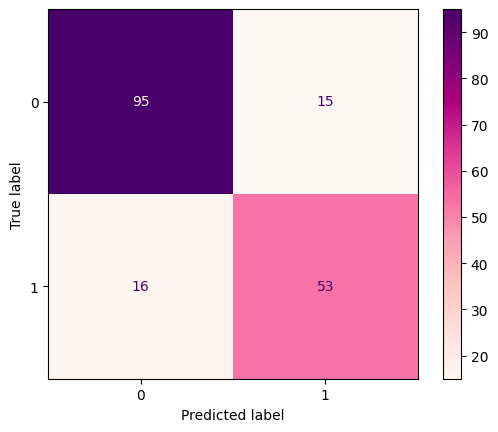

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(voting, X_valid, y_valid,cmap="RdPu")

In [56]:
from sklearn.ensemble import StackingClassifier
stk = StackingClassifier(estimators=[('cat', cat),
                                      ('lgb', lgb), 
                                      ('xgb', xgb),
                                      ('rfc', rfc)])
stk.fit(X_train,y_train)
stk_pred = stk.predict(X_valid)

print('Accuracy: ', accuracy_score(y_valid, stk_pred))

Accuracy:  0.8268156424581006


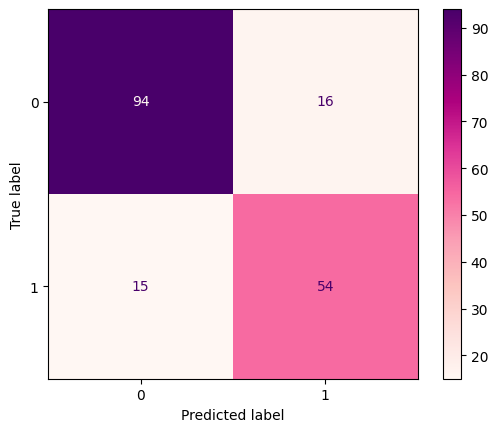

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(stk, X_valid, y_valid,cmap="RdPu")

In [58]:
sub = pd.DataFrame(test_data['PassengerId'])
sub["Survived"]=best_voting.predict(test_data.drop(columns=["PassengerId"]))
sub["Survived"]=sub["Survived"]
sub.to_csv('submission_weighted.csv',index=False)
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [59]:
sub = pd.DataFrame(test_data['PassengerId'])
sub["Survived"]=stk.predict(test_data.drop(columns=["PassengerId"]))
sub["Survived"]=sub["Survived"]
sub.to_csv('submission_stk.csv',index=False)
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [60]:
sub = pd.DataFrame(test_data['PassengerId'])
sub["Survived"]=voting.predict(test_data.drop(columns=["PassengerId"]))
sub["Survived"]=sub["Survived"]
sub.to_csv('submission_voting.csv',index=False)
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [61]:
sub = pd.DataFrame(test_data['PassengerId'])
sub["Survived"]=cat.predict(test_data.drop(columns=["PassengerId"]))
sub["Survived"]=sub["Survived"]
sub.to_csv('submission_catboost.csv',index=False)
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [62]:
sub = pd.DataFrame(test_data['PassengerId'])
sub["Survived"]=xgb.predict(test_data.drop(columns=["PassengerId"]))
sub["Survived"]=sub["Survived"]
sub.to_csv('submission_xgboost.csv',index=False)
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [63]:
sub = pd.DataFrame(test_data['PassengerId'])
sub["Survived"]=lgb.predict(test_data.drop(columns=["PassengerId"]))
sub["Survived"]=sub["Survived"]
sub.to_csv('submission_lightgbm.csv',index=False)
sub

,PassengerId,Survived
0,892,1
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [64]:
sub = pd.DataFrame(test_data['PassengerId'])
sub["Survived"]=rfc.predict(test_data.drop(columns=["PassengerId"]))
sub["Survived"]=sub["Survived"]
sub.to_csv('submission_randomforest.csv',index=False)
sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
